This notebook is to continue the investigations of the anomalous signals reported in observation 248140. Previously, we have seen increased amounts of flagging, as well as amplitude spikes at various parts of the night.

In [2]:
%matplotlib inline
#This file will explore data from our current measurement set 
#outside of casa, and attempt to analyse signal amplitude across 
#a variety of baselines.

#initialize
from pyuvdata import UVData
import numpy as np
import numpy.ma as ma
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi

UV=UVData()

In [3]:
UV.read_miriad('/data6/HERA/data/2458140/zen.2458140.31206.xx.HH.uvOR')
#get signal amp array
#make empty array
diff_array=[]
#start loop
#get element of signal array
##get baseline data
#subtract next element
#place difference into empty array
#repeat until loop ends
#plot
#
#print(data.shape)
print('done')

done


1
11


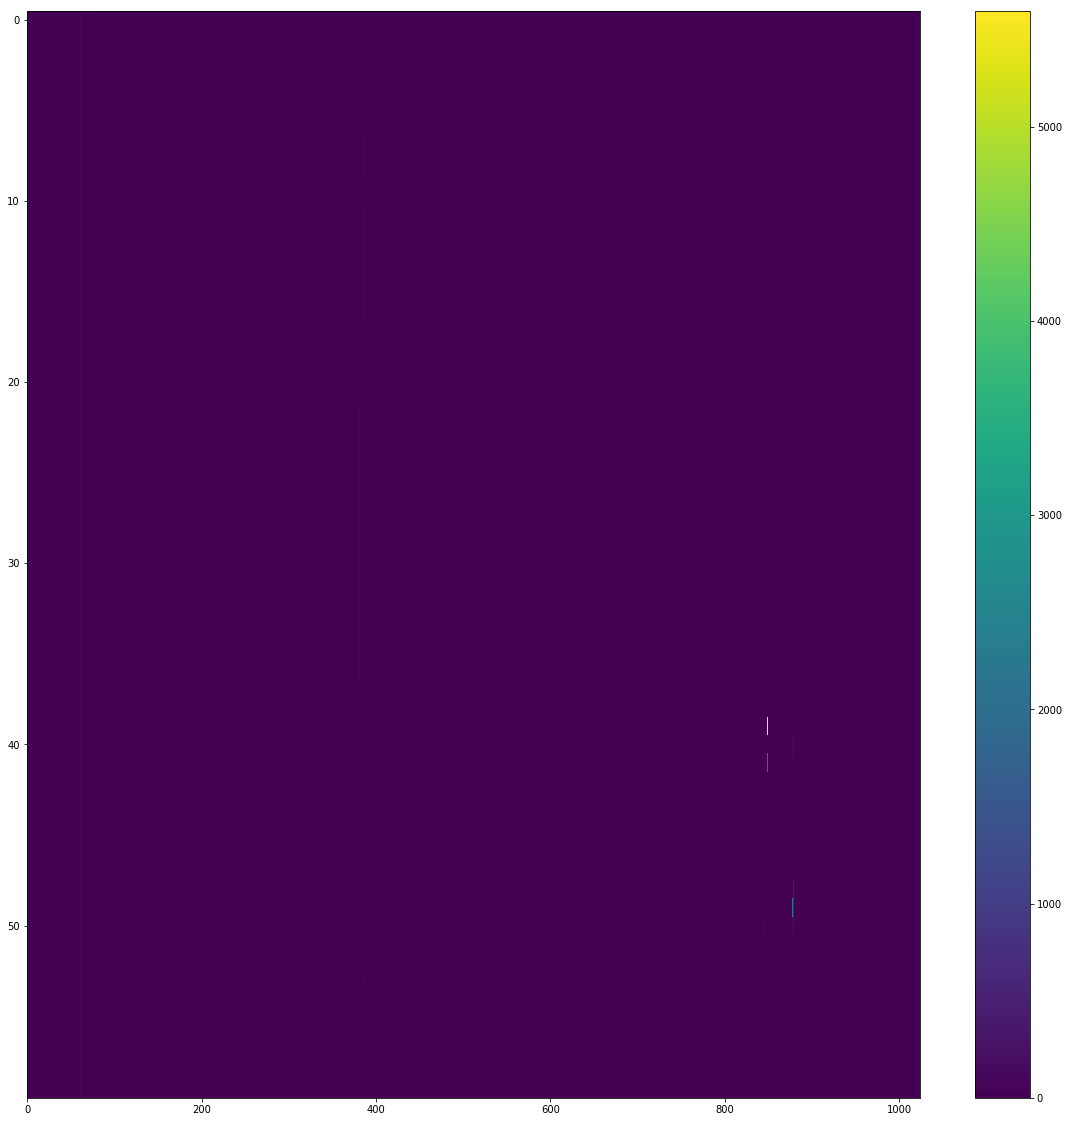

In [4]:
#ant1=UV.antenna_numbers[np.random.randint(UV.antenna_numbers.size)]
#ant2=UV.antenna_numbers[np.random.randint(UV.antenna_numbers.size)]
ant1=1
ant2=11

print(ant1)
print(ant2)

data=UV.get_data(ant1, ant2)

plt.figure(figsize=(20,20))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data),aspect='auto' )

plt.colorbar()
plt.show()

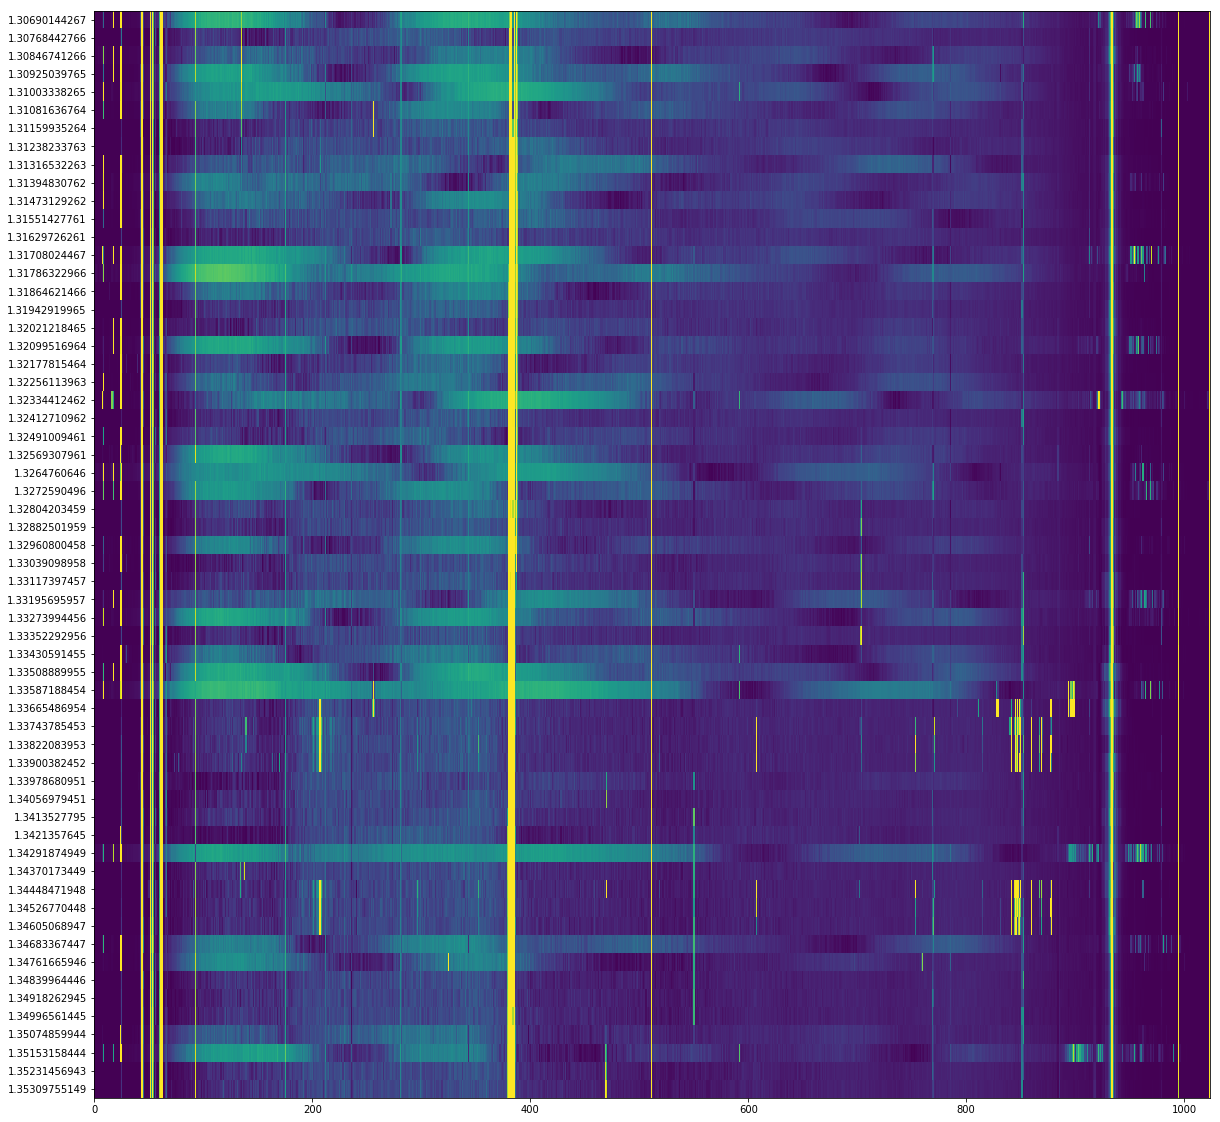

In [5]:

#get the times from a portion of above, convert to LST so we can check it against a good time
times=UV.get_times(ant1,ant2)
#print(times)
UV.set_lsts_from_time_array()
ind=UV.antpair2ind(ant1,ant2)
lst_times=UV.lst_array[ind]

#print(lst_times)

plt.figure(figsize=(20,20))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.yticks(np.arange(0,60,1),lst_times)
plt.show()

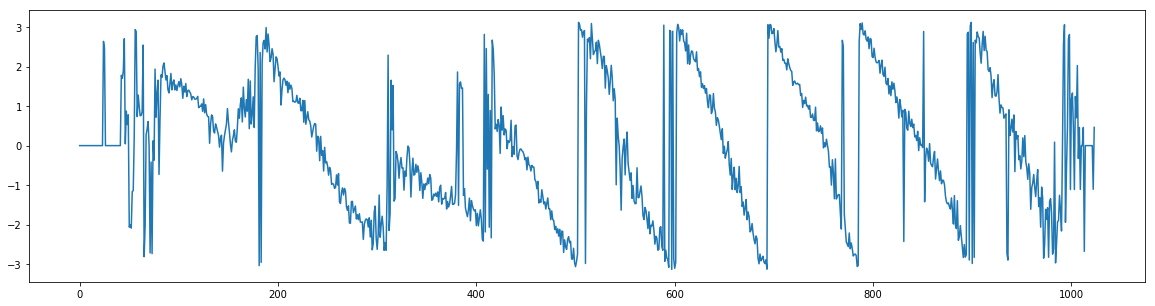

In [107]:
plt.figure(figsize=(20,5))
plt.plot(np.angle(data[2]))
#plt.plot(np.angle(data[25]))
#plt.ylim([-1,1])
#plt.semilogy(np.real(data[24]))
plt.show()

(59, 1024)


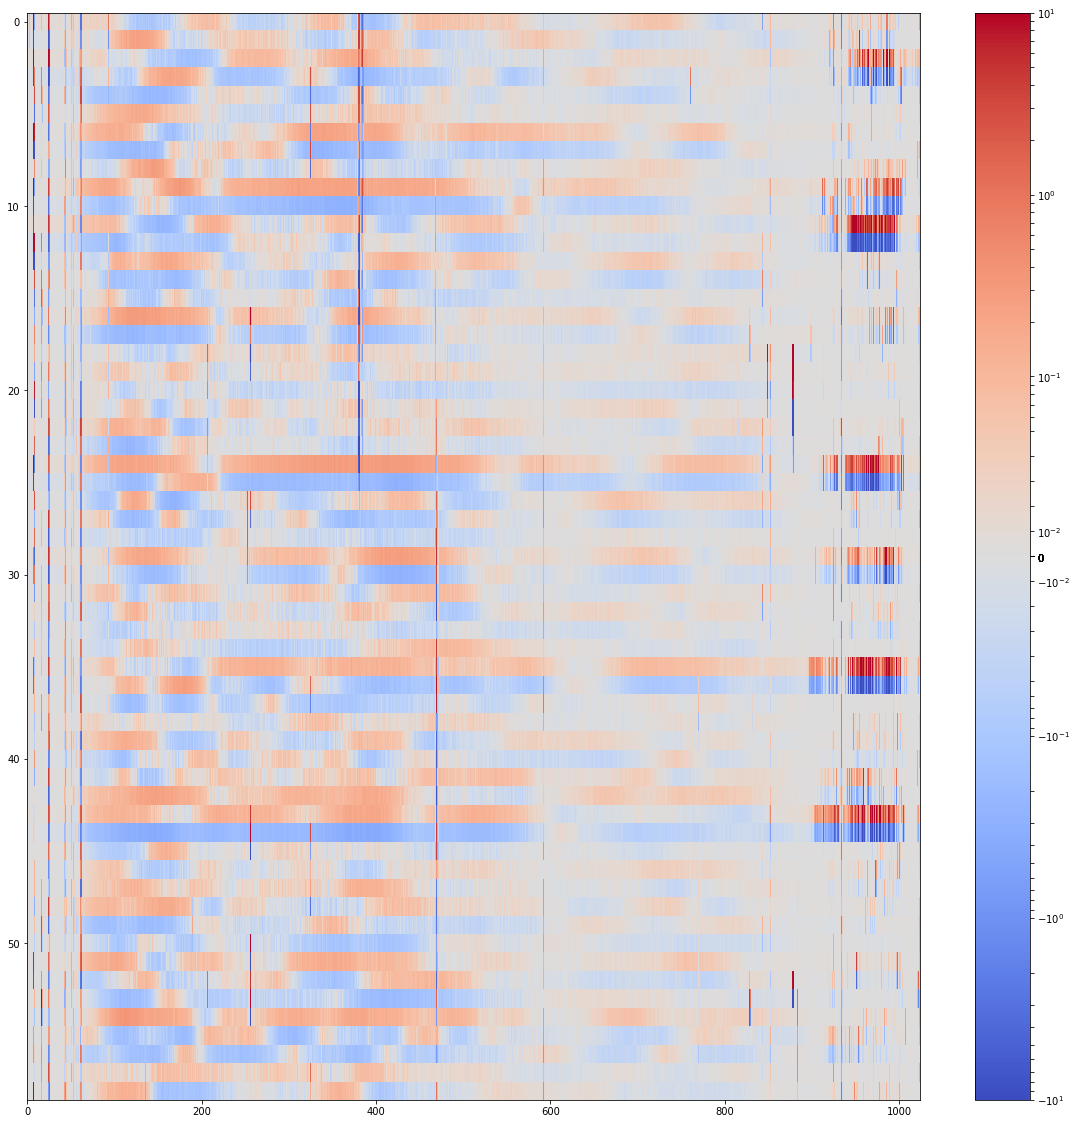

In [115]:
d_data=np.diff(np.abs(data), axis=0)
print(d_data.shape)

plt.figure(figsize=(20,20))
plt.imshow(np.real(d_data), aspect='auto', norm=SymLogNorm(vmin=-10,vmax=10,linthresh=.05), cmap='coolwarm')
plt.colorbar()
plt.show()



In [6]:
hist_arr=np.reshape(d_data,(1,d_data.size))
hist_arr=np.real(hist_arr[0])
print(hist_arr.shape)
print(min(hist_arr))
print(max(hist_arr))
print(hist_arr)

(60416,)
-43.8022
38.2023
[  1.20353687e-03   1.44481682e-03   1.40857708e-03 ...,   1.95503235e-04
   1.12533569e-04   4.23435211e-01]


Fitted mean =  319.387685959
Fitted standard deviation =  3605.4385952


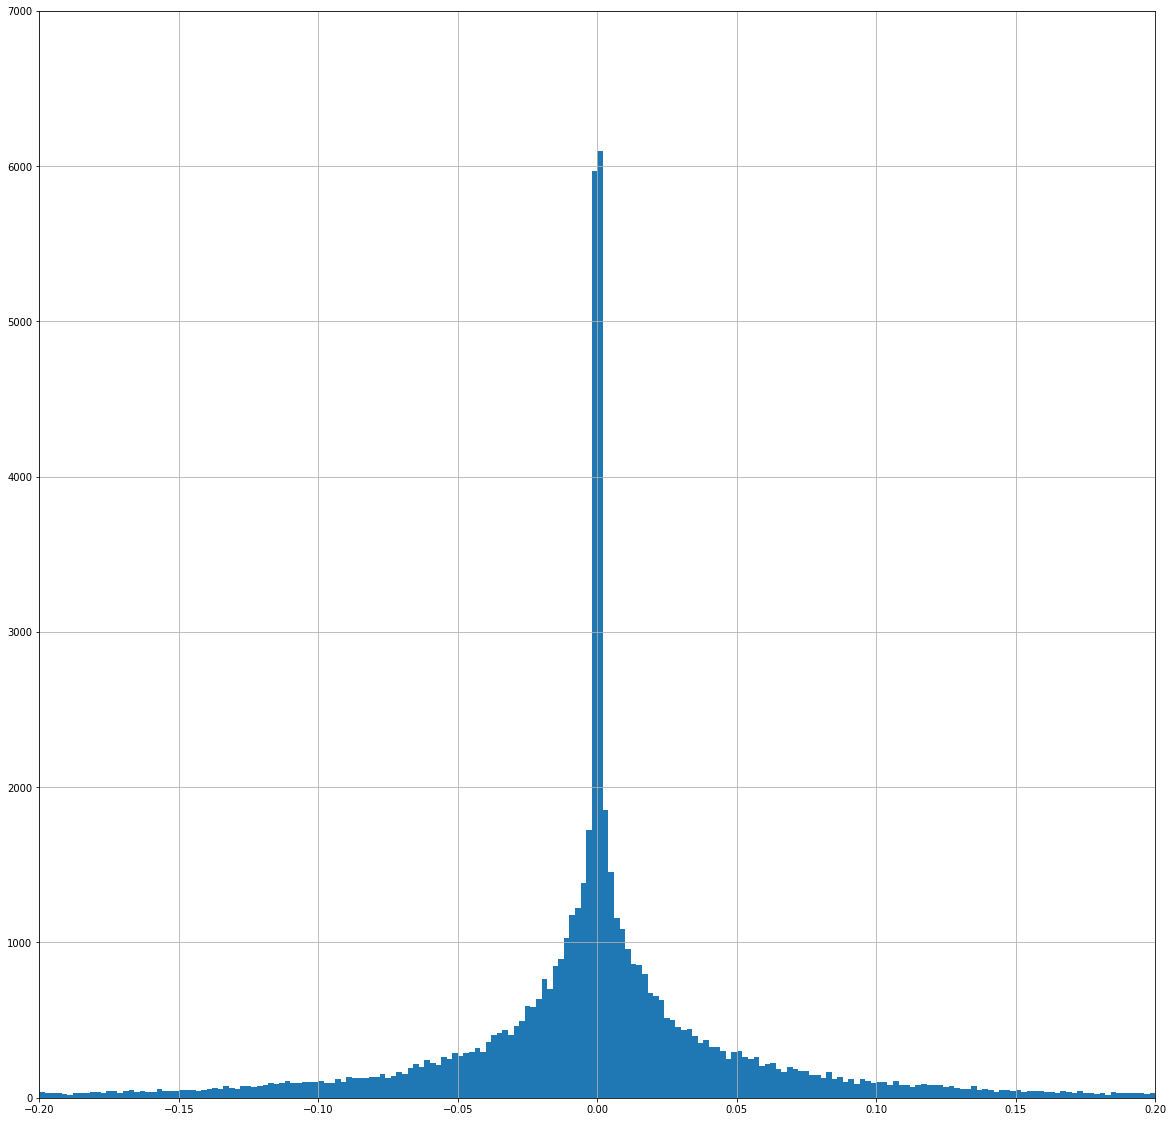

In [118]:
from scipy.stats import norm
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

plt.figure(figsize=(20,20))
histplt=[]
bins=[]
histplt,bin_edges,patches=plt.hist(hist_arr,range=([-.2,.2]), bins=200)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, histplt, p0=p0)

hist_fit = gauss(bin_centres, *coeff)

#plt.plot(bin_centres, histplt, label='Test data')
#plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]

plt.axis([-.2,.2,0,7000])
plt.grid(True)
plt.show()

In [99]:
UV.read_miriad('/data6/HERA/data/2458042/KM_uvR_files/zen.2458042.38650.xx.HH.uvR')



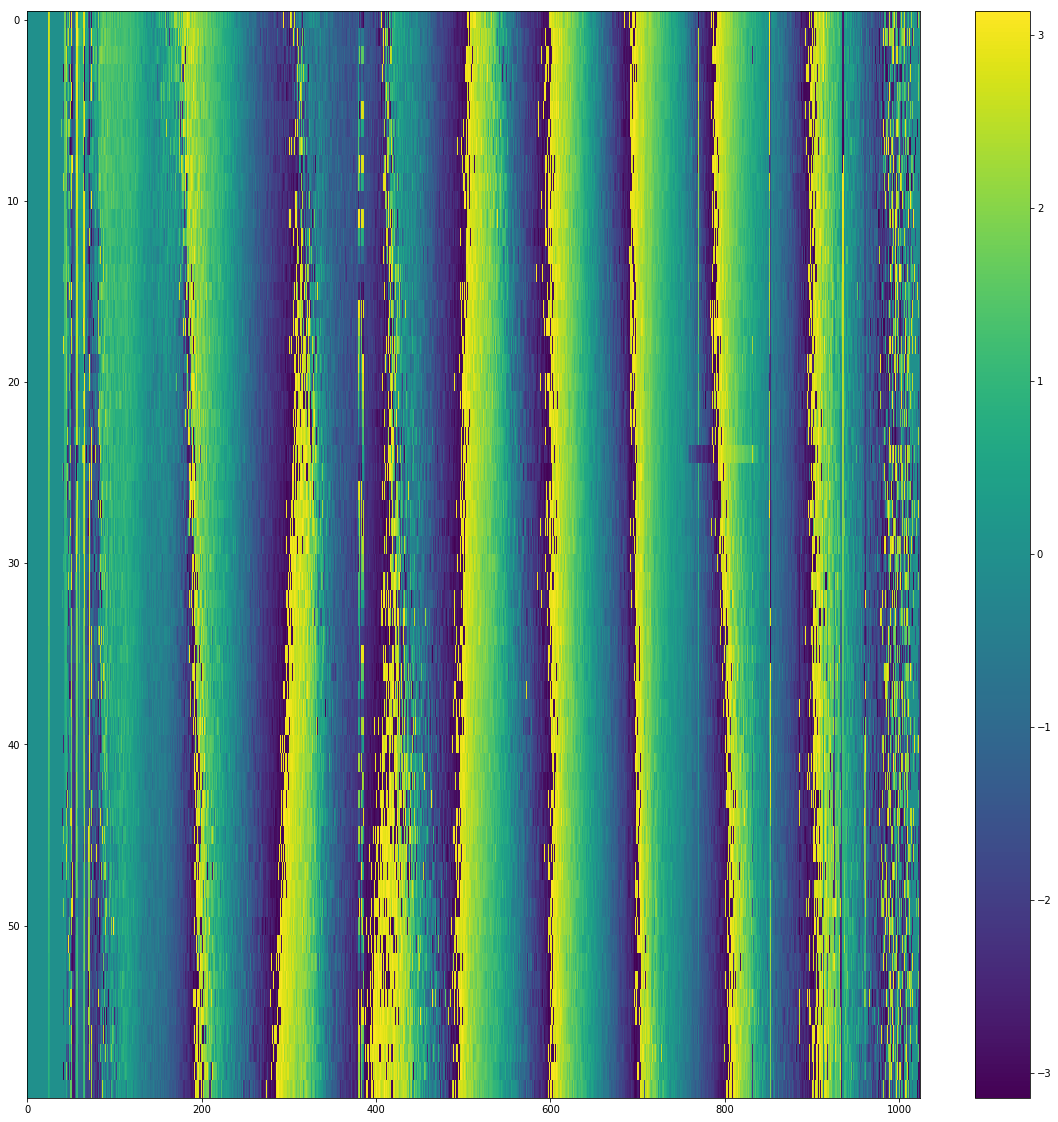

In [100]:
UV.phase_to_time(UV.time_array[0])
data=UV.get_data(ant1, ant2)

plt.figure(figsize=(20,20))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.angle(data), aspect='auto', )

plt.colorbar()
plt.show()

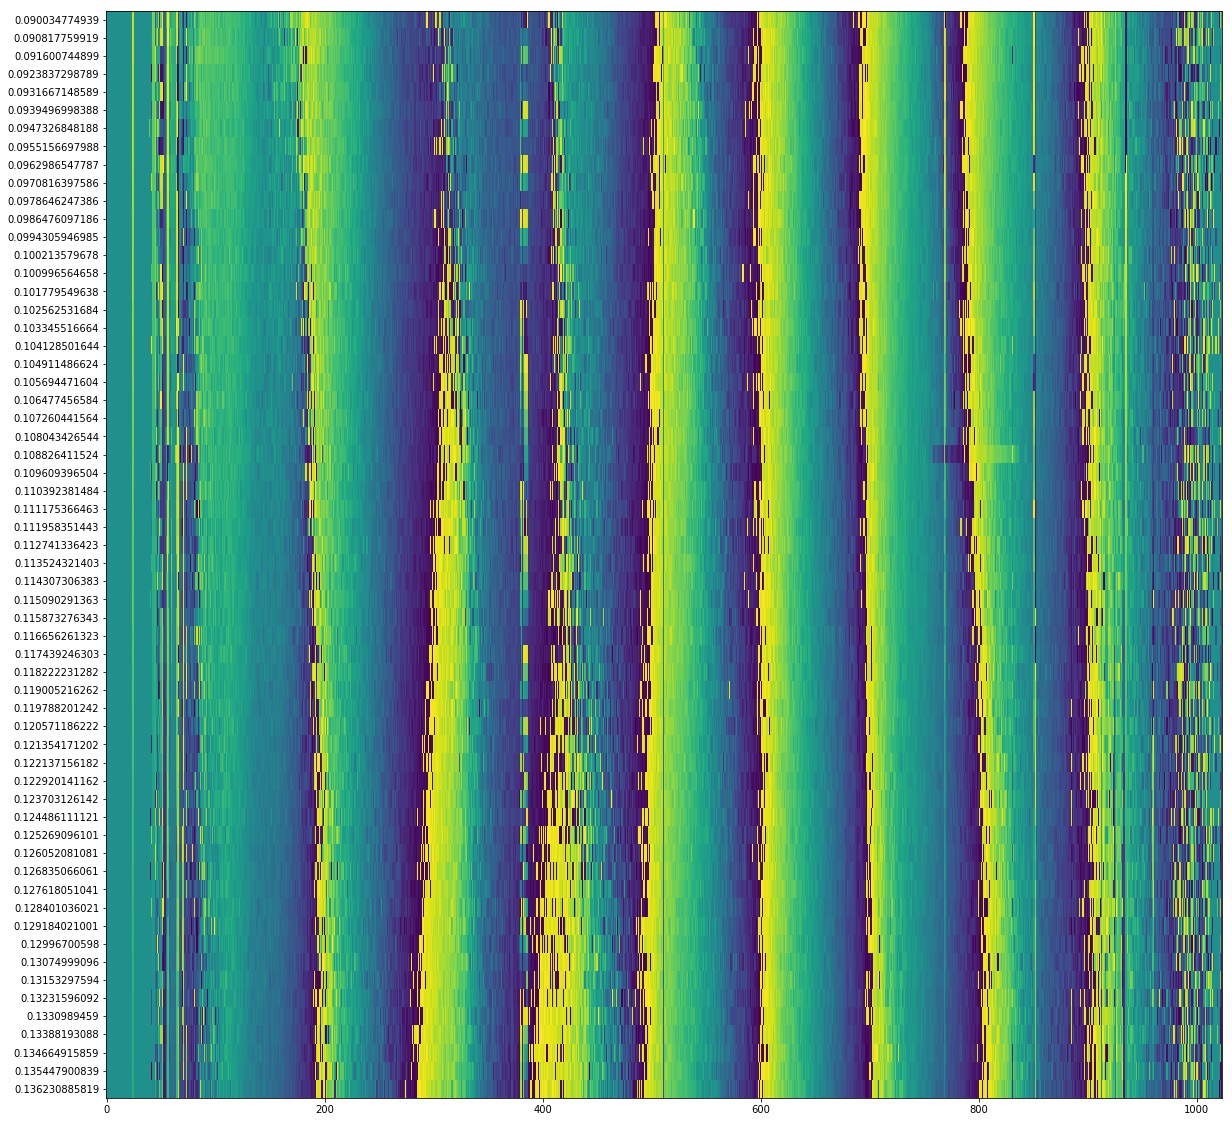

In [101]:

#get the times from a portion of above, convert to LST so we can check it against a good time
times=UV.get_times(ant1,ant2)
#print(times)
UV.set_lsts_from_time_array()
ind=UV.antpair2ind(ant1,ant2)
lst_times=UV.lst_array[ind]

#print(lst_times)

plt.figure(figsize=(20,20))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.angle(data), aspect='auto', )
plt.yticks(np.arange(0,60,1),lst_times)
plt.show()